# Homework 1

* Name: Linh Huynh
* Github Username: ak-linh24
* PSID: 2280140


In [54]:
!pip install pandas matplotlib numpy seaborn scipy -q
import pandas as pd # Package to read data files and store columns as a dataframe
import matplotlib.pyplot as plt # Package to support plots
import numpy as np # Package to support data types
import seaborn as sns # Package to support heatmap plots
from scipy.stats import zscore # Needed to perform z-score normalization

''' Read data file winequality.csv '''
df = pd.read_csv("winequality.csv", sep=",")


## Question 1: Compute summary statistics of each attribute. What are your two favorite statistical measures, explain why you like them and why are they important for this dataset.

In [46]:
summary = df.describe().T  
summary["median"] = df.median()
summary["iqr"] = df.quantile(0.75) - df.quantile(0.25)
summary["range"] = df.max() - df.min() 
print("Summary statistics:\n", summary[["count", "mean", "std", "min", "25%", "median", "50%", "75%", "max", "iqr", "range"]])

Summary statistics:
                        count       mean        std      min      25%  \
fixed acidity         1599.0   8.319637   1.741096  4.60000   7.1000   
volatile acidity      1599.0   0.527821   0.179060  0.12000   0.3900   
citric acid           1599.0   0.270976   0.194801  0.00000   0.0900   
residual sugar        1599.0   2.538806   1.409928  0.90000   1.9000   
chlorides             1599.0   0.087467   0.047065  0.01200   0.0700   
free sulfur dioxide   1599.0  15.874922  10.460157  1.00000   7.0000   
total sulfur dioxide  1599.0  46.467792  32.895324  6.00000  22.0000   
density               1599.0   0.996747   0.001887  0.99007   0.9956   
pH                    1599.0   3.311113   0.154386  2.74000   3.2100   
sulphates             1599.0   0.658149   0.169507  0.33000   0.5500   
alcohol               1599.0  10.422983   1.065668  8.40000   9.5000   
quality               1599.0   5.636023   0.807569  3.00000   5.0000   

                        median       50%  

* My two favorite statistics summary are *Mean* and *Median*. The reason both of them are my favorite to use in this dataset and they are significant is because *Mean* helps me determine the average of each attribute of the wine quality. And with that, *Median* joins in to help find the 50% quartile of the wine quality dataset, where it could be used to compare the distance of the gap between the average and the median. Help the analysis to be able to figure out the quality level of each attribute and later determine the percentage of splitting into training and testing data before putting it in the training models. Another thing I like about them is how often I used them throughout my academic life, where it is really common to spot them. 

## Question 2: Compute the correlations for each of the pair of attributes available in the dataset. Interpret the statistical findings.


Correlation with quality:
 quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


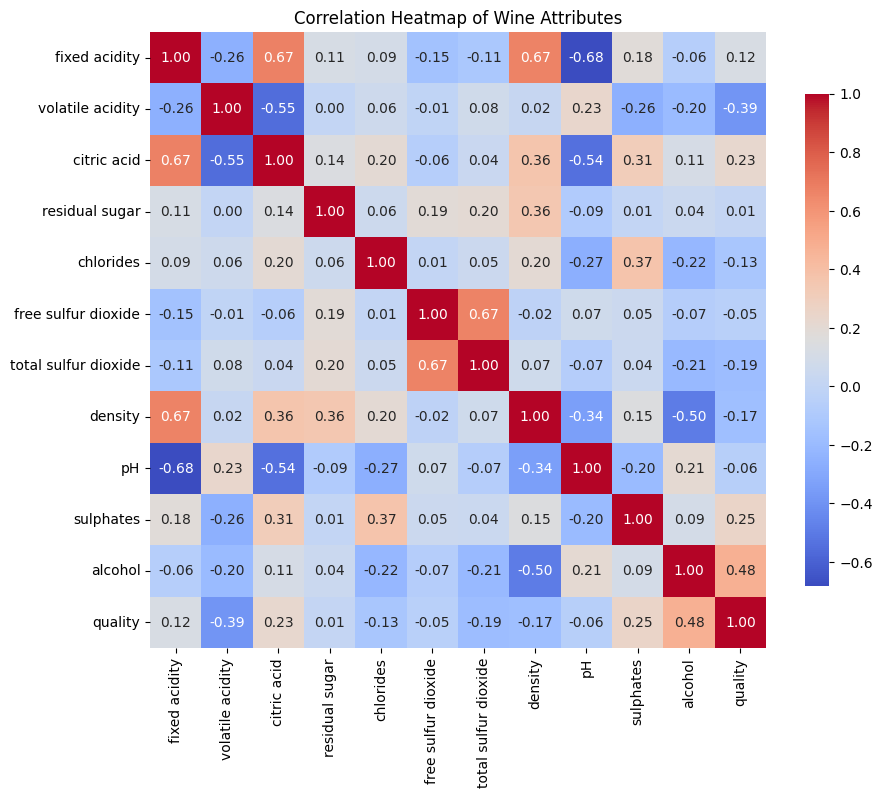

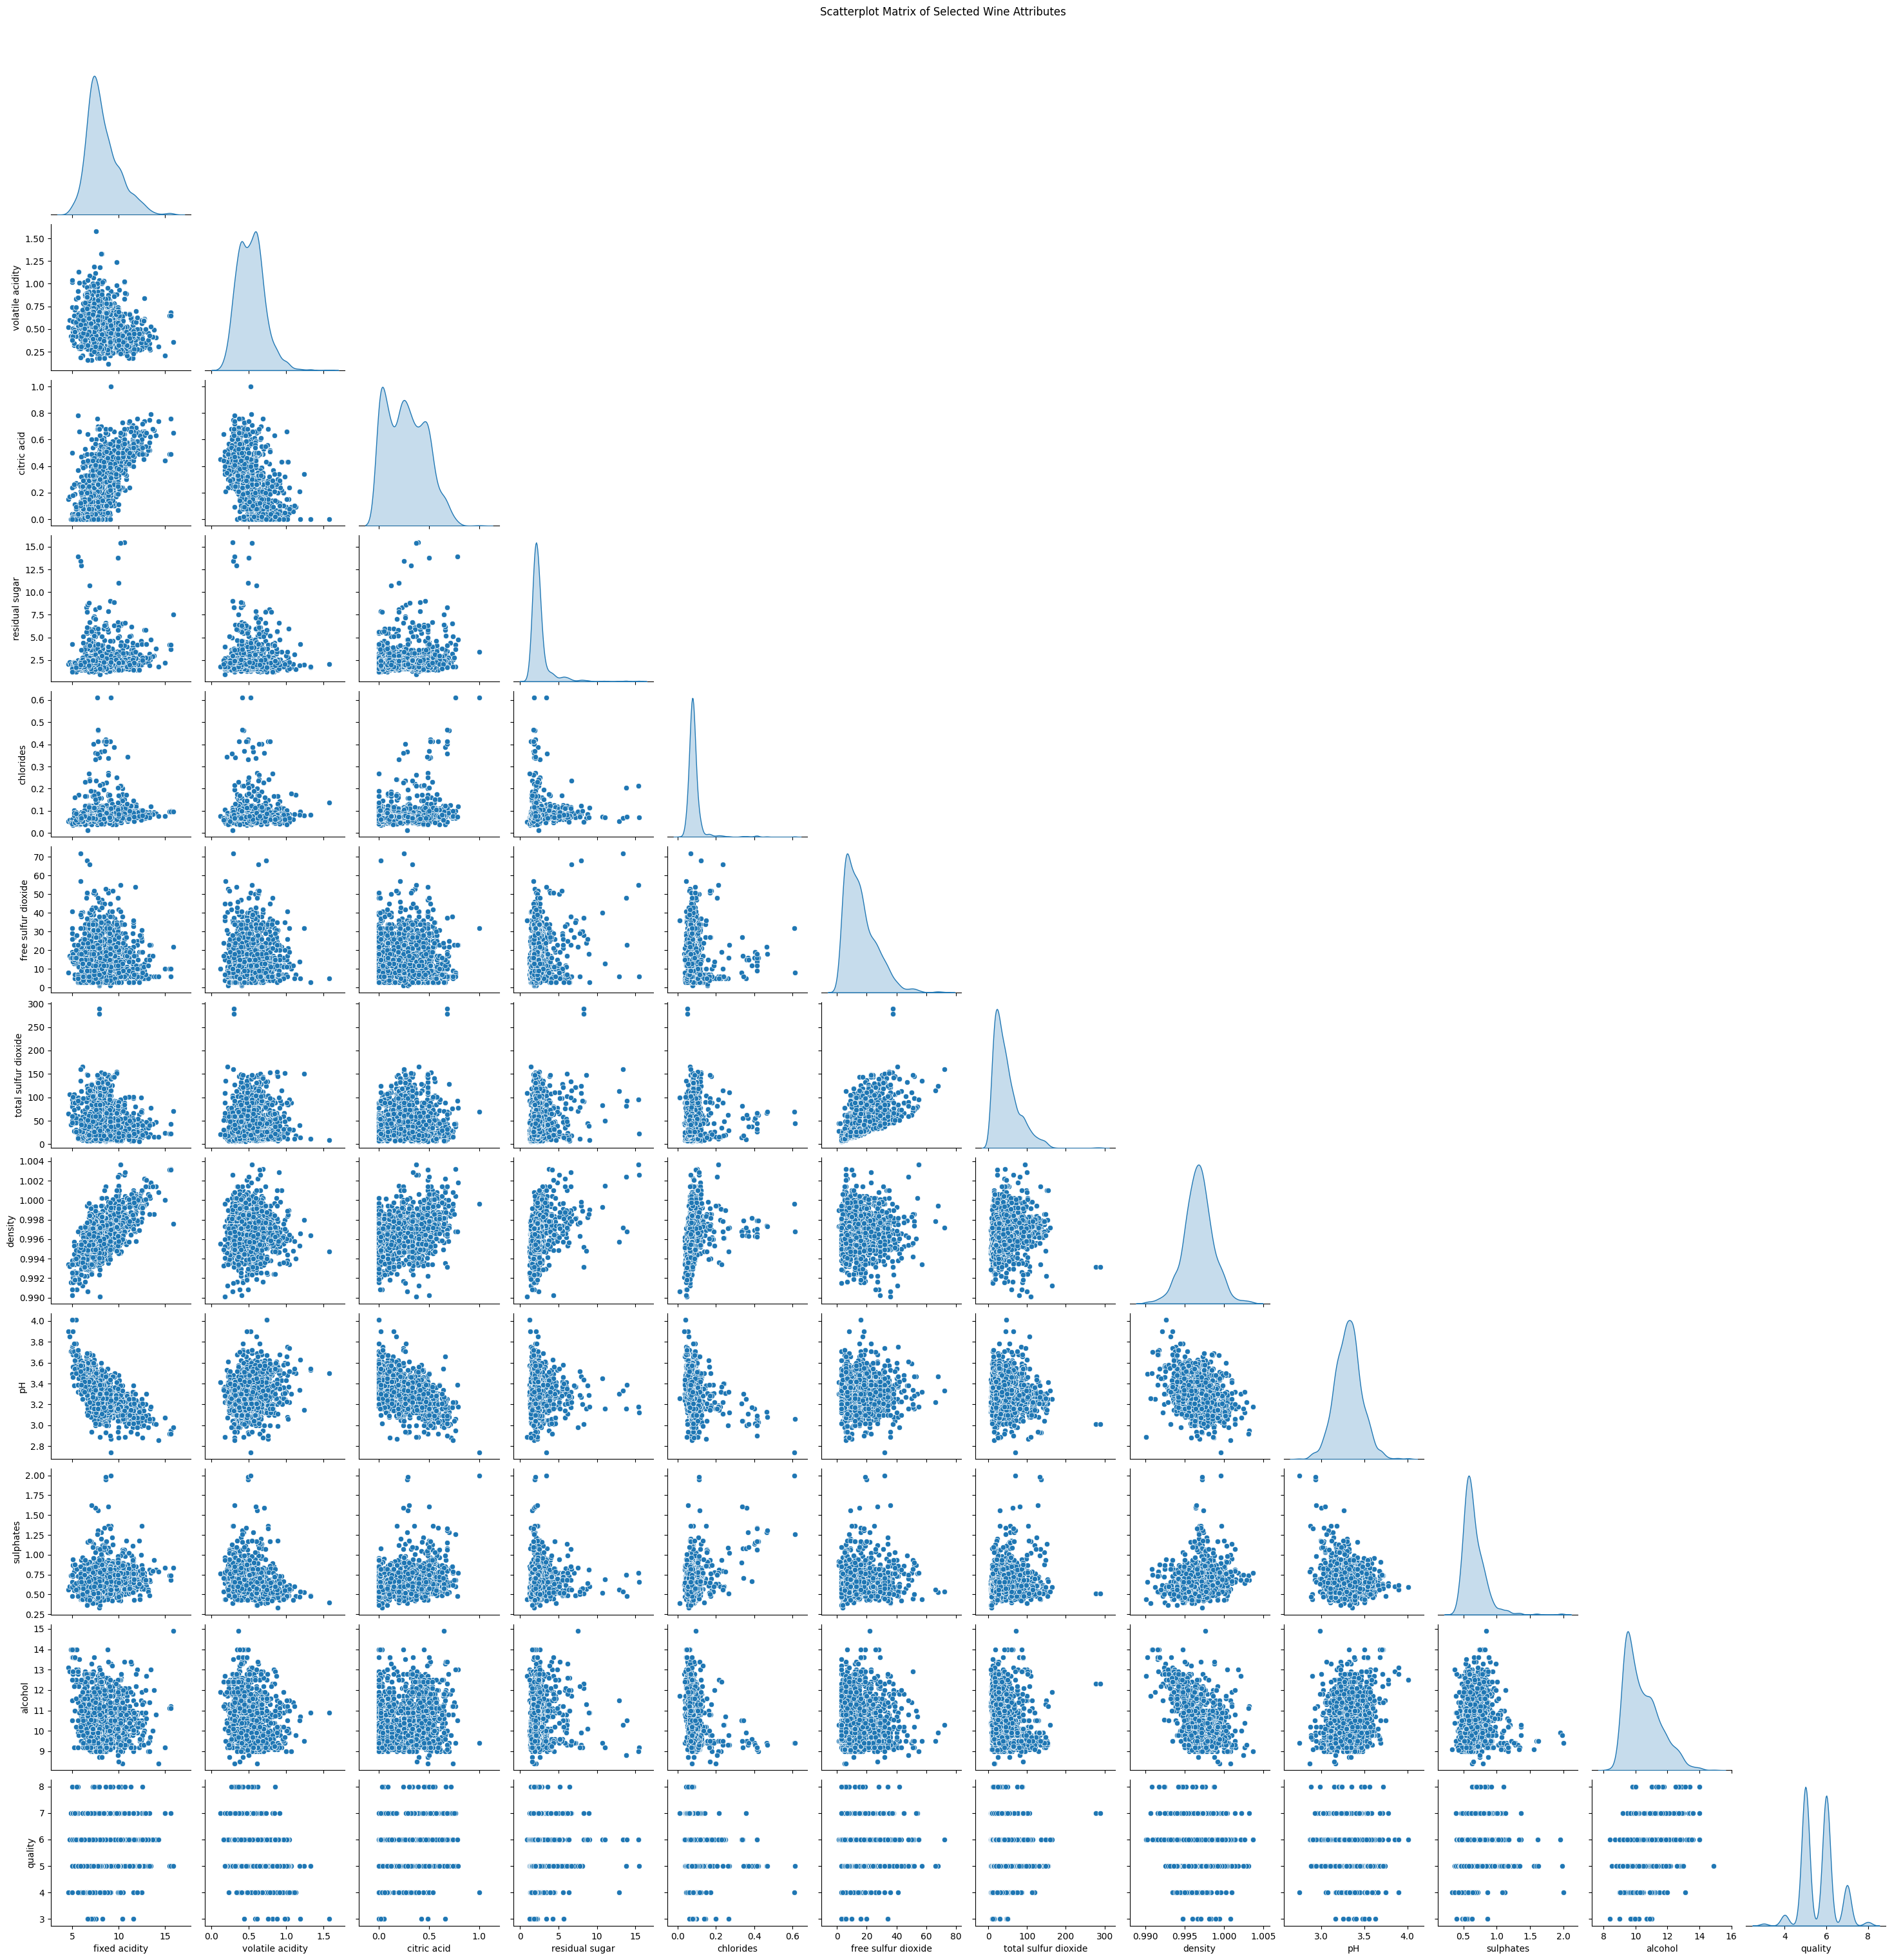

In [55]:
# Correlation matrix
corr = df.corr(numeric_only=True)
print("\nCorrelation with quality:\n", corr["quality"].sort_values(ascending=False))

# --- First plot: Heatmap ---
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", 
            square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of Wine Attributes")
plt.show()

# --- Second plot: Scatterplot Matrix ---
cols = ["fixed acidity", "volatile acidity", "citric acid", 
        "residual sugar", "chlorides", "free sulfur dioxide", "total sulfur dioxide",
        "density", "pH", "sulphates", "alcohol", "quality"]

g = sns.pairplot(df[cols], diag_kind="kde", corner=True)
g.fig.suptitle("Scatterplot Matrix of Selected Wine Attributes", y=1.02)
plt.show()

* According to both the heatmap and scatterplot matrices, it helps show the correlation relationship between one attribute and the other. As we could see, there are some positive linear relationships between citric acid vs fixed acidity, density vs fixed acidity, and total sulfur dioxide vs free sulfur dioxide. If you pay attention to this graph, they are the only three that have the same decimal value on the heatmap, which is 0.67, meaning any value that shows higher than approximately 0.60 often shows a positive correlation relationship. Meanwhile, if it is below approximately -0.50, then the plot on a scatterplot would show a negative correlation relationship, for instance: pH vs fixed acidity, citric acid vs volatile acidity, pH vs citric acid, and alcohol vs density. 

## Question 3: Create a scatter plot for the attributes *residual sugar* and *pH* and interpret the plot.

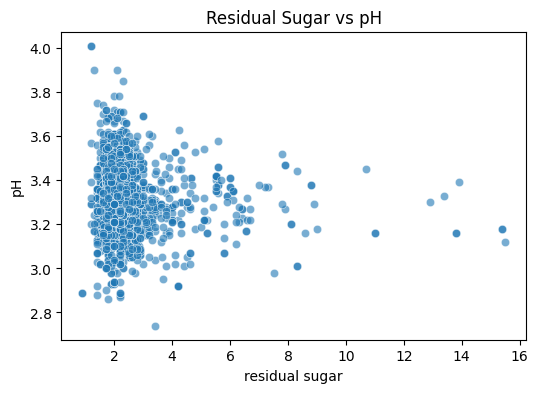

In [48]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="residual sugar", y="pH", alpha=0.6, legend=False)
plt.title("Residual Sugar vs pH")
plt.show()

* As we look in the scatter plots of *pH* and *residual sugar*, we can see that cluster plot located at the range of 3.0 to 3.75 from *pH*. This showing there no linear, positive, or negative relationship appear in this plot, instead there were few outlier have higher  *residual sugar* in the cluster group. Since, the plot only show a region of cluster, it morelikely to be uni-model

## Question 4: Create a scatter plot for the attributes *fixed acidity* and *citric acid* and interpret the plot.

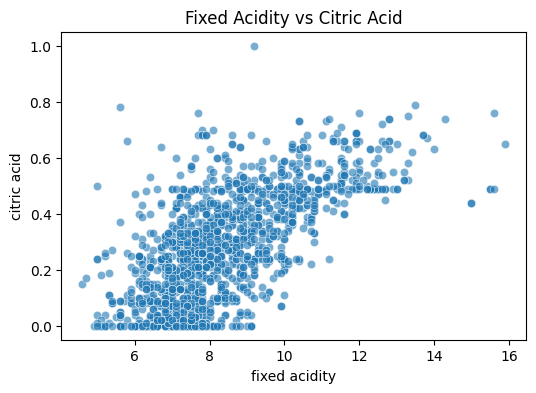

In [49]:
plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x="fixed acidity", y="citric acid",  alpha=0.6, legend=False)
plt.title("Fixed Acidity vs Citric Acid")
plt.show()

* There seem to show a positive non-linear relationship spreading between *citric acid* and *fixed acidity*. But seem like the line stop at the 0.8 *critic acid* and one of the plot is outlier reaching above 1.0 *critic acid*. 

## Question 5: Create histogram of the *quality* attribute and interpret the resulting histogram.

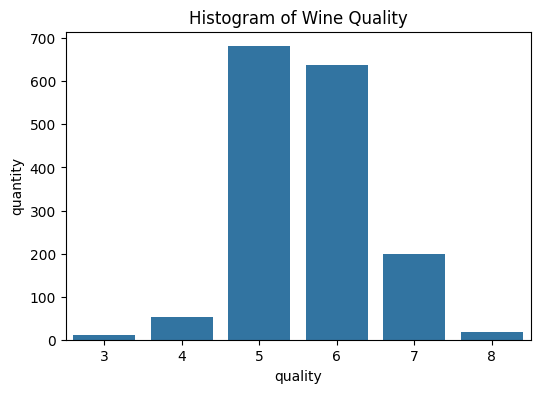

In [50]:
plt.figure(figsize=(6, 4))
sns.countplot(x="quality", data=df)
plt.title("Histogram of Wine Quality")
plt.ylabel('quantity')
plt.show()

* Based on the quantity of the quality, we could see the range from 5 to 6 has the highest quantity, where the amount exceeds 600, showing us that these quality rate are the highest. This histogram contains multi-modal as the middle region has two hills, it looks sort of like a Bell Curve, where the bar shows slowly going high then drops down from 3 to 8. Perhaps there are a few outliers at 3 and 8 as they have the shortest height in the bar graph despite the other. No gaps are showing between the attribute value distribution. I have a feeling *mean* would be somewhere around 5 and 6 meanwhile the *mode* would be 5 since it the tallest among others bar. 

## Question 6: Create box plots for *alcohol* and *pH* attributes for the instances of the 3 *quality* class (Bad, Good, and Very Good), and a box plot for all instances in the dataset. Interpret the resulting box plots. Compare the two box plots.

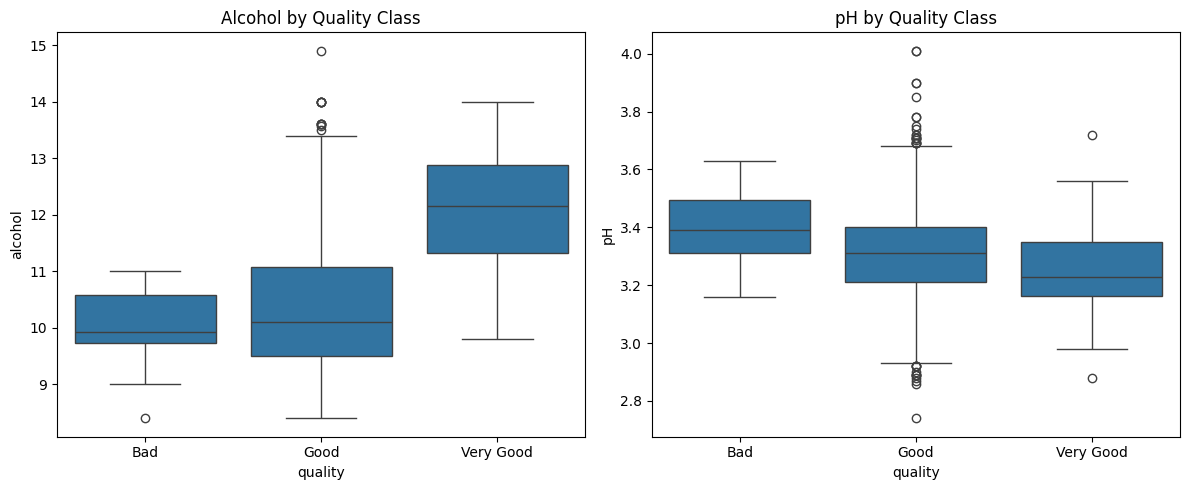

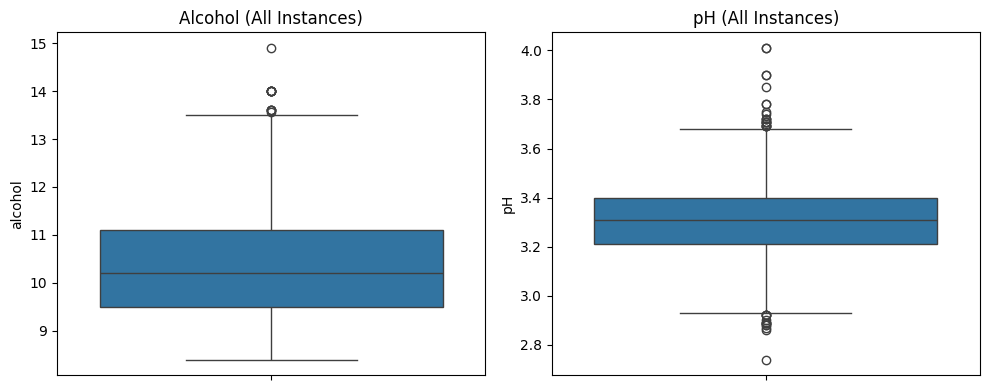

In [51]:
def label_quality(q):
    if q < 4:
        return "Bad"
    elif q <= 7:
        return "Good"
    else:
        return "Very Good"

df["quality"] = df["quality"].apply(label_quality)

# --- First row (Alcohol & pH by Quality Class) ---
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(x="quality", y="alcohol", data=df, order=["Bad", "Good", "Very Good"], ax=axes[0])
axes[0].set_title("Alcohol by Quality Class")

sns.boxplot(x="quality", y="pH", data=df, order=["Bad", "Good", "Very Good"], ax=axes[1])
axes[1].set_title("pH by Quality Class")

plt.tight_layout()
plt.show()

# --- Second row (Alcohol & pH All Instances) ---
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(y="alcohol", data=df, ax=axes[0])
axes[0].set_title("Alcohol (All Instances)")

sns.boxplot(y="pH", data=df, ax=axes[1])
axes[1].set_title("pH (All Instances)")

plt.tight_layout()
plt.show()

* Interpret Alcohol vs Quality: We could see that the *Very Good* quantities are higher than *Good* and *Bad*, whereas the alcohol median of *Very Good* is eventually highest among the three. We also could see there was one outlier at the *Bad* quality with an alcohol level below 9. And a few other outliers at the *Good* quality that are above ~13.3. There are also low levels of *Bad* in Alcohol quantities compared to other qualities. 
* Interpret pH vs Quality: In this plot, there were lots of outliers shown at *Good* quality where the pH was beyond ~3.7 and below ~2.98. For *Very Good*, it has two outliers, where one is above 3.6 and one is below 3.0. We can also see that the median of *Bad* quality is the highest among the other two, yet the highest pH value belongs to *Good* quality. 
* Interpret Alcohol (All Instances): The median for Alcohol was above 10. The gap between Q3 and Max is larger than the gap between Q1 and Min. Also, we can see that the distance from the median to Q3 is higher than from Q1, as shown. There are a few outliers that are above the maximum that appear on the boxplot. 
* Interpret pH (All Instances): The IQR for the pH plot is pretty small compared to other previous plots, plus we can see there are lots of outliers from both above the maximum of 3.7 and below the  minimum region ~2.98. 

* Comparison: For the *pH* plot, we could see that the medians are higher than the *Alcohol*, meanwhile, the IQR of the *Alcohol* is bigger than the IQR of *pH*. The interval between 75% and the maximum of *Alcohol* is longer than the same interval compared to *pH*. We also could see that the maximum of *Alcohol* is slightly higher than the maximum of *pH*. The outlier of *pH*, where a lot more than the *Alcohol*, especially it has the outlier that reaches below the minimum that the *Alcohol* doesn't have. So, at the end, both box plots show different behavior, meaning they disagree with each other, especially the *Alcohol* plot seems to be right-skewed and the *pH* roughly symmetric. 

## Question 7: Write a brief conclusion summarizing the most important findings of this task; in particular, address the findings obtained related to predicting the quality of red wine.

* To conclude, throughout this wine quality dataset, the attribute statistics showed that mainly the wine quality has lots of *Good*, where the quality goes from 5 to 7, from Histogram on question 5. And as we zoomed through the box plot, we could see that  from the *Good* quality, there were quite a lot of outliers for the  pH boxplot and the interval whiskers of alcohol from the 75% quartile to the maximum, making it look right-skewed. These tell us how the majority of the red wine quality belongs at *Good*, more than the other two quality levels assigned. 